In [1]:
import numpy as np
import pandas as pd

# Load dataset

In [2]:
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data visualization 

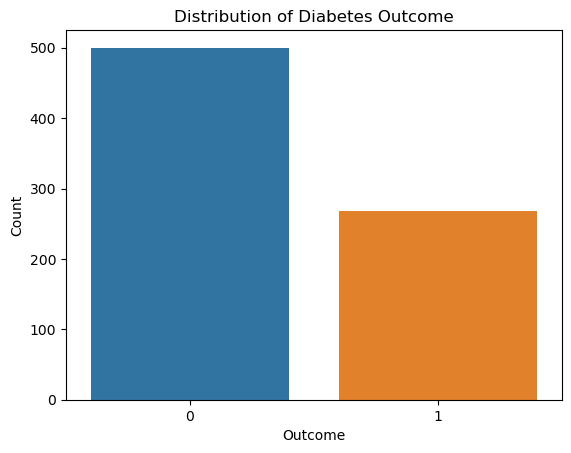

In [6]:
sns.countplot(x='Outcome',data=df)
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

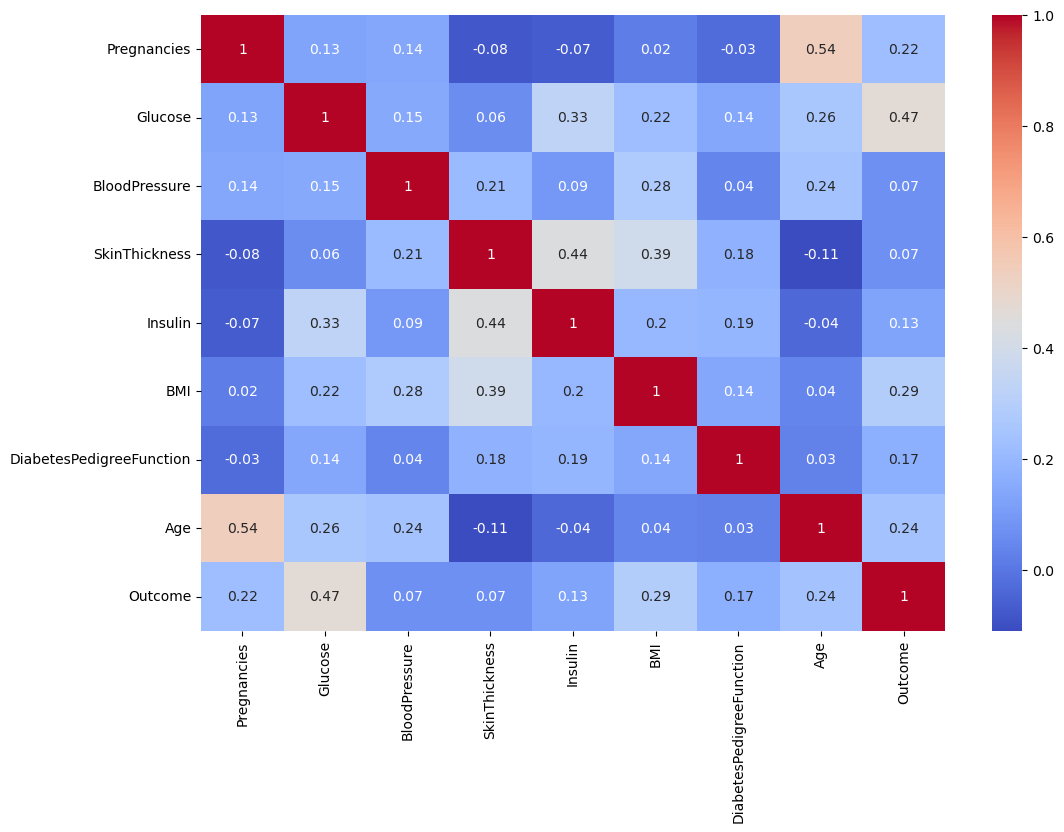

In [7]:
plt.figure(figsize=(12,8))
correlation_matrix=df.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True,cmap='coolwarm')
plt.show()

# data preprocessing

In [8]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

# Splitting data

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)

In [13]:
len(train_X)

614

In [14]:
len(test_X)

154

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
reg_model=LogisticRegression(max_iter=1000)

# Training models

In [17]:
reg_model.fit(train_X,train_y)

LogisticRegression(max_iter=1000)

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
dec_tree=DecisionTreeClassifier()

In [20]:
dec_tree.fit(train_X,train_y)

DecisionTreeClassifier()

# Logistic Regression

In [21]:
y_pred_reg=reg_model.predict(test_X)

In [22]:
y_pred_reg

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1],
      dtype=int64)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [34]:
print(confusion_matrix(test_y,y_pred_reg))

[[86  5]
 [28 35]]


In [35]:
print(classification_report(test_y, y_pred_reg))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84        91
           1       0.88      0.56      0.68        63

    accuracy                           0.79       154
   macro avg       0.81      0.75      0.76       154
weighted avg       0.80      0.79      0.77       154



In [38]:
accuracy_reg=accuracy_score(test_y,y_pred_reg)
accuracy_reg

0.7857142857142857

# decision tree

In [27]:
y_pred_tree=dec_tree.predict(test_X)

In [39]:
print(confusion_matrix(test_y,y_pred_tree))

[[70 21]
 [28 35]]


In [40]:
print(classification_report(test_y,y_pred_tree))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74        91
           1       0.62      0.56      0.59        63

    accuracy                           0.68       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.68      0.68      0.68       154



In [41]:
accuracy_tree=accuracy_score(test_y,y_pred_tree)
accuracy_tree

0.6818181818181818

# Making a single predictions using logistic regression

In [49]:
sample_data=test_X[0].reshape(1,-1)
predicted_outcome_log_reg =reg_model.predict(sample_data)
predicted_outcome_log_reg[0]

0

# Making a single predictions using Decision Tree

In [44]:
predicted_outcome_tree=dec_tree.predict(sample_data)
predicted_outcome_tree[0]

0

In [33]:
predicted_outcome_tree=dec_tree.predict(sample_data)
print(predicted_outcome_tree[0])

0
